In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from adjustText import adjust_text
import matplotlib.patheffects as path_effects

# Replace 'your_shapefile_path' with the path to your shapefile
gdf = gpd.read_file('../../../data/raw/cb_2018_us_cbsa_500k.shp')
gdf_CT = gpd.read_file('../../../data/raw/cb_2018_us_state_500k.shp')
gdf_counties = gpd.read_file('../../../data/raw/cb_2018_us_county_500k.shp')
gdf_towns = gpd.read_file('../../../data/raw/Town_Polygon.shp')

# Replace 'population_csv_path' with the path to your population data CSV
land_cover_CT = pd.read_excel('../../../data/raw//table 2015.xlsx', sheet_name='Sheet 1')
land_cover_CT_cleaned = land_cover_CT.dropna()
land_cover_CT_cleaned = land_cover_CT_cleaned.reset_index(drop=True)
land_cover_CT_only_town = land_cover_CT_cleaned.drop(land_cover_CT_cleaned.index[-1])
land_cover_CT_only_town.rename(columns={'Town': 'TOWN'}, inplace=True)
land_cover_CT_only_town['All forest']=land_cover_CT_only_town['deciduous forest']+land_cover_CT_only_town['coniferous forest']+land_cover_CT_only_town['forested wetland']
land_cover_CT_only_town

,TOWN,Unnamed: 1,developed,turf & grass,other grass,ag field,deciduous forest,coniferous forest,water,non-forested wetland,forested wetland,tidal wetland,barren,utility row,All forest
0,Andover,2015,901.2,326.6,249.7,488.6,7197.5,76.8,339.6,75.3,267.3,0.0,23.4,110.9,7541.6
1,Ansonia,2015,1920.4,382.4,43.3,32.3,1378.0,38.2,125.1,14.7,42.5,0.0,23.2,0.0,1458.7
2,Ashford,2015,1875.5,677.3,306.6,1816.5,16275.5,2541.4,536.4,198.1,1015.3,0.0,25.9,0.0,19832.2
3,Avon,2015,3550.7,1773.9,275.1,511.0,5730.5,2167.5,440.8,24.5,422.6,0.0,74.1,21.7,8320.6
4,Barkhamsted,2015,1826.6,494.5,320.1,548.1,6932.8,11942.5,1821.8,86.3,692.1,0.0,57.8,52.9,19567.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Windsor Locks,2015,3274.8,615.1,440.8,181.7,1066.9,38.3,239.4,1.1,58.0,0.0,60.2,0.0,1163.2
165,Wolcott,2015,2809.1,856.6,243.8,75.7,8030.9,401.4,495.9,11.2,385.4,0.0,85.4,144.3,8817.7
166,Woodbridge,2015,2419.3,1414.3,168.2,291.0,6713.7,414.0,254.2,63.7,421.7,0.0,17.0,106.9,7549.4
167,Woodbury,2015,2477.2,1313.5,293.5,3233.5,13533.7,1611.7,232.3,57.5,559.9,0.0,148.2,54.0,15705.3


In [2]:
gdf_towns

,OBJECTID,TBPOLY_COD,TOWN_POLY,AV_LEGEND,IMS_LEGEND,COASTP_COD,COAST_POLY,STATE_COD,FIPS_COD,TOWN_NO,TOWN,CNTY_COD,COUNTY,ACREAGE,AREA_SQMI,SHAPE_Leng,SHAPE_Area,geometry
0,1,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,122,Salisbury,5,Litchfield,38514.300781,60.178600,0.596666,1.693281e-02,"POLYGON ((-73.48739 42.04956, -73.48280 42.049..."
1,2,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,100,North Canaan,5,Litchfield,12495.099609,19.523500,0.330442,5.496483e-03,"POLYGON ((-73.29629 42.04700, -73.28804 42.046..."
2,3,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,98,Norfolk,5,Litchfield,29663.300781,46.348900,0.469949,1.304085e-02,"POLYGON ((-73.17214 42.04340, -73.16961 42.043..."
3,4,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,29,Colebrook,5,Litchfield,21046.599609,32.885399,0.401726,9.255303e-03,"POLYGON ((-73.05308 42.03979, -73.05240 42.039..."
4,5,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09003,65,Hartland,3,Hartford,21935.199219,34.273800,0.430597,9.646552e-03,"POLYGON ((-72.97902 42.03826, -72.97767 42.038..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,781,100.0,Connecticut Town,Connecticut Town,Town,2,Coastal Island Polygons,CT,09001,57,Greenwich,1,Fairfield,2.502160,0.003910,0.005064,1.083612e-06,"POLYGON ((-73.63445 40.99528, -73.63476 40.995..."
781,782,100.0,Connecticut Town,Connecticut Town,Town,2,Coastal Island Polygons,CT,09001,57,Greenwich,1,Fairfield,35.702000,0.055784,0.023188,1.546062e-05,"POLYGON ((-73.63743 40.99258, -73.63756 40.992..."
782,783,100.0,Connecticut Town,Connecticut Town,Town,2,Coastal Island Polygons,CT,09001,57,Greenwich,1,Fairfield,0.666138,0.001041,0.002090,2.884606e-07,"POLYGON ((-73.60855 40.99066, -73.60847 40.990..."
783,784,100.0,Connecticut Town,Connecticut Town,Town,2,Coastal Island Polygons,CT,09001,57,Greenwich,1,Fairfield,4.012030,0.006269,0.006438,1.737306e-06,"POLYGON ((-73.61188 40.98802, -73.61197 40.988..."


In [3]:
inland_data = gdf_towns[gdf_towns['COASTP_COD'] == 1]
sorted_df = inland_data.sort_values(by='ACREAGE', ascending=False)

# Keep only the first occurrence of each town name (largest ACREAGE)
town_final = sorted_df.drop_duplicates(subset='TOWN', keep='first')
town_final  = town_final.sort_values(by='TOWN')
town_final.reset_index(drop=True, inplace=True)
merged_data = pd.merge(town_final, land_cover_CT_only_town, how="left", left_on="TOWN", right_on="TOWN")
merged_data

,OBJECTID,TBPOLY_COD,TOWN_POLY,AV_LEGEND,IMS_LEGEND,COASTP_COD,COAST_POLY,STATE_COD,FIPS_COD,TOWN_NO,...,ag field,deciduous forest,coniferous forest,water,non-forested wetland,forested wetland,tidal wetland,barren,utility row,All forest
0,58,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09013,1,...,488.6,7197.5,76.8,339.6,75.3,267.3,0.0,23.4,110.9,7541.6
1,150,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09009,2,...,32.3,1378.0,38.2,125.1,14.7,42.5,0.0,23.2,0.0,1458.7
2,19,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09015,3,...,1816.5,16275.5,2541.4,536.4,198.1,1015.3,0.0,25.9,0.0,19832.2
3,44,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09003,4,...,511.0,5730.5,2167.5,440.8,24.5,422.6,0.0,74.1,21.7,8320.6
4,16,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,5,...,548.1,6932.8,11942.5,1821.8,86.3,692.1,0.0,57.8,52.9,19567.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,22,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09003,165,...,181.7,1066.9,38.3,239.4,1.1,58.0,0.0,60.2,0.0,1163.2
165,89,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09009,166,...,75.7,8030.9,401.4,495.9,11.2,385.4,0.0,85.4,144.3,8817.7
166,138,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09009,167,...,291.0,6713.7,414.0,254.2,63.7,421.7,0.0,17.0,106.9,7549.4
167,94,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,168,...,3233.5,13533.7,1611.7,232.3,57.5,559.9,0.0,148.2,54.0,15705.3


In [4]:
CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]

#extract a single row out as the dataframe
HEM = result.iloc[0:1]
NHM = result.iloc[3:4]
BSN = result.iloc[4:5]

# Load population data for each MSA
NHM_population = 864751  # Replace with actual population data
HEM_population = 1213324  # Replace with actual population data
BSN_population = 956446   # Replace with actual population data

# Merge population data with the GeoDataFrames
NHM['population'] = NHM_population
HEM['population'] = HEM_population
BSN['population'] = BSN_population

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_580\1510644713.py:32: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


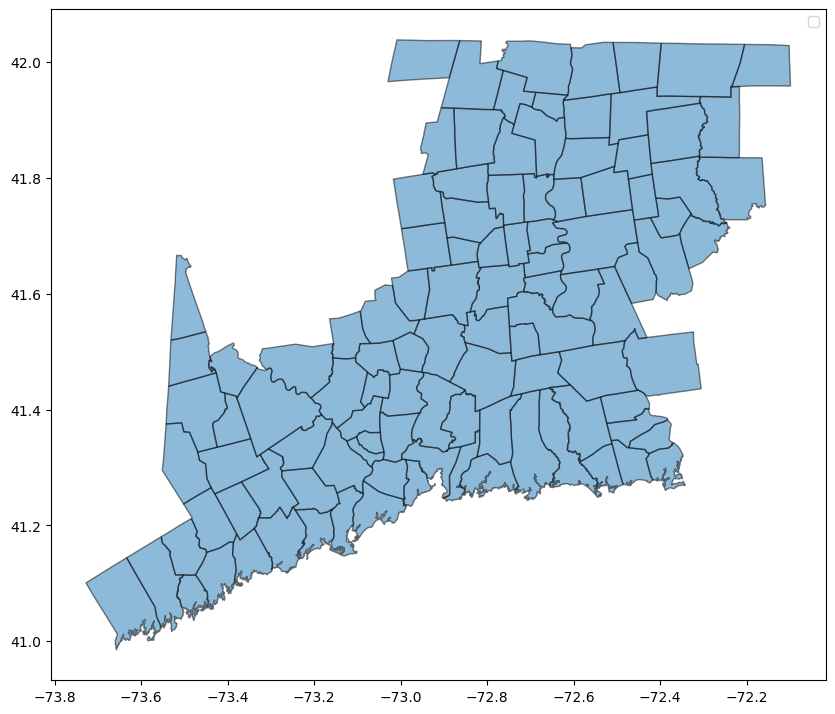

In [6]:

# Load the shapefile for the towns in Connecticut
towns = merged_data

# Define county to MSA mappings
county_to_msa = {
    'New Haven': 'New Haven MSA',
    'Fairfield': 'Bridgeport MSA',
    'Hartford': 'Hartford MSA',
    'Tolland': 'Hartford MSA',
    'Middlesex': 'Hartford MSA'
}

# Create separate GeoDataFrames for each county
county_gdfs = {}
for county, msa in county_to_msa.items():
    county_gdfs[county] = towns[towns['COUNTY'] == county]

# Combine towns in each county into MSAs
msa_gdfs = {}
for county, msa in county_to_msa.items():
    if msa not in msa_gdfs:
        msa_gdfs[msa] = county_gdfs[county]
    else:
        msa_gdfs[msa] = gpd.GeoDataFrame(pd.concat([msa_gdfs[msa], county_gdfs[county]], ignore_index=True))
        


# Plot all MSAs on the same map
fig, ax = plt.subplots(figsize=(10, 10))
for msa, gdf in msa_gdfs.items():
    gdf.plot(ax=ax, alpha=0.5, edgecolor='k', label=msa)
ax.legend()
plt.show()

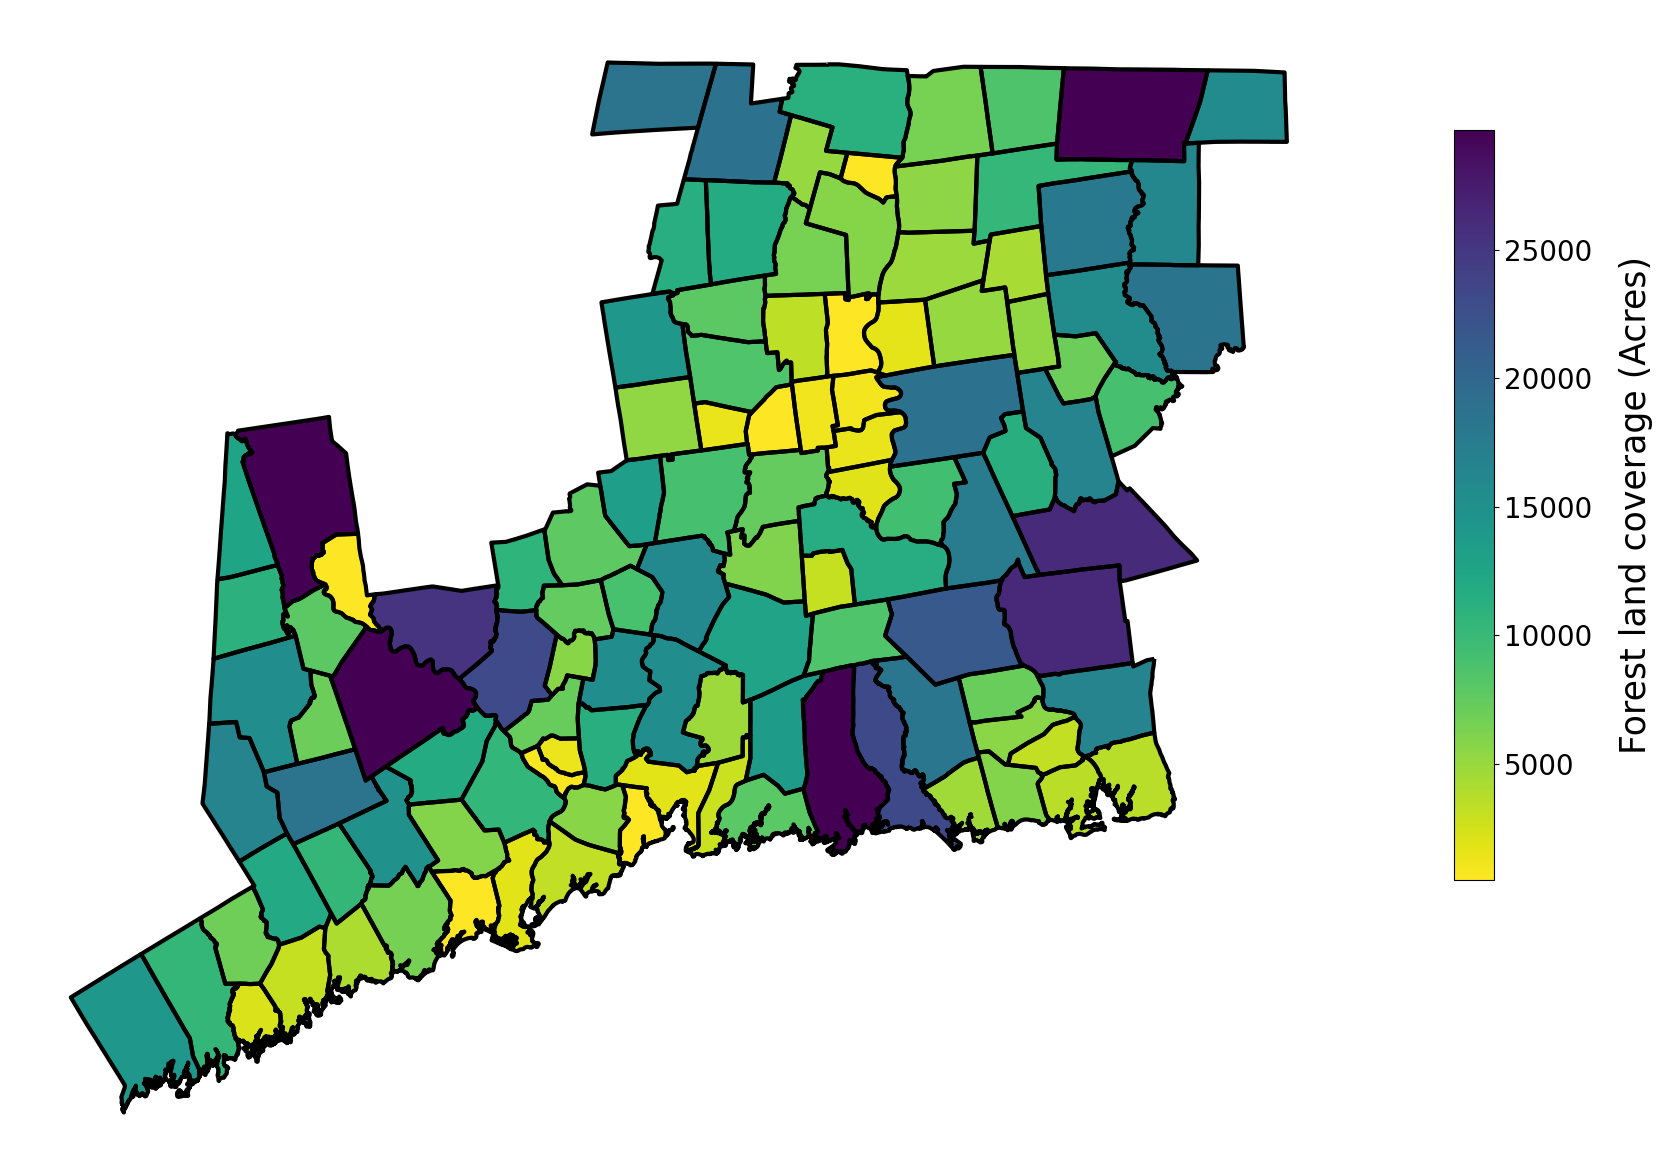

In [7]:
towns = merged_data
# Additional towns to include
additional_towns = ['NEW MILFORD', 'BRIDGEWATER', 'LYME', 'OLD LYME', 'COLCHESTER']

# Create GeoDataFrame for additional towns
additional_towns_gdf = towns[towns['TOWN'].str.upper().isin(additional_towns)]

# Concatenate additional towns GeoDataFrame with existing towns GeoDataFrame
towns_gdf = pd.concat([towns, additional_towns_gdf], ignore_index=True)

# Define county to MSA mappings
county_to_msa = {
    'New Haven': 'New Haven MSA',
    'Fairfield': 'Bridgeport MSA',
    'Hartford': 'Hartford MSA',
    'Tolland': 'Hartford MSA',
    'Middlesex': 'Hartford MSA'
}

# Create separate GeoDataFrames for each county
county_gdfs = {}
for county, msa in county_to_msa.items():
    county_gdfs[county] = towns_gdf[towns_gdf['COUNTY'] == county]

# Combine towns in each county into MSAs
msa_gdfs = {}
for county, msa in county_to_msa.items():
    if msa not in msa_gdfs:
        msa_gdfs[msa] = county_gdfs[county]
    else:
        msa_gdfs[msa] = gpd.GeoDataFrame(pd.concat([msa_gdfs[msa], county_gdfs[county]], ignore_index=True))

# Plot all MSAs and additional towns on the same map with heatmap
fig, ax = plt.subplots(figsize=(20, 15))
# Remove frame and ticks
ax.axis('off')

# Plot the heatmap for each MSA
for msa, gdf in msa_gdfs.items():
    gdf.plot(column='All forest', cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap
    gdf.boundary.plot(ax=ax, linewidth=3, color='black')  # Plot the boundary of each MSA

# Add additional towns to the heatmap
additional_towns_gdf.plot(column='All forest', cmap='viridis_r', ax=ax, markersize=50)
# Plot boundaries for additional towns
additional_towns_gdf.boundary.plot(ax=ax, linewidth=3, color='black')

# Add a colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=plt.Normalize(vmin=merged_data['All forest'].min(), vmax=merged_data['All forest'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)
colorbar.set_label('Forest land coverage (Acres)', labelpad=20, fontsize=25)  
colorbar.ax.tick_params(axis='y', labelsize=20)  
plt.savefig('../../../figures/Report-images/heatmap-CT-forest.png', dpi=600, bbox_inches='tight')

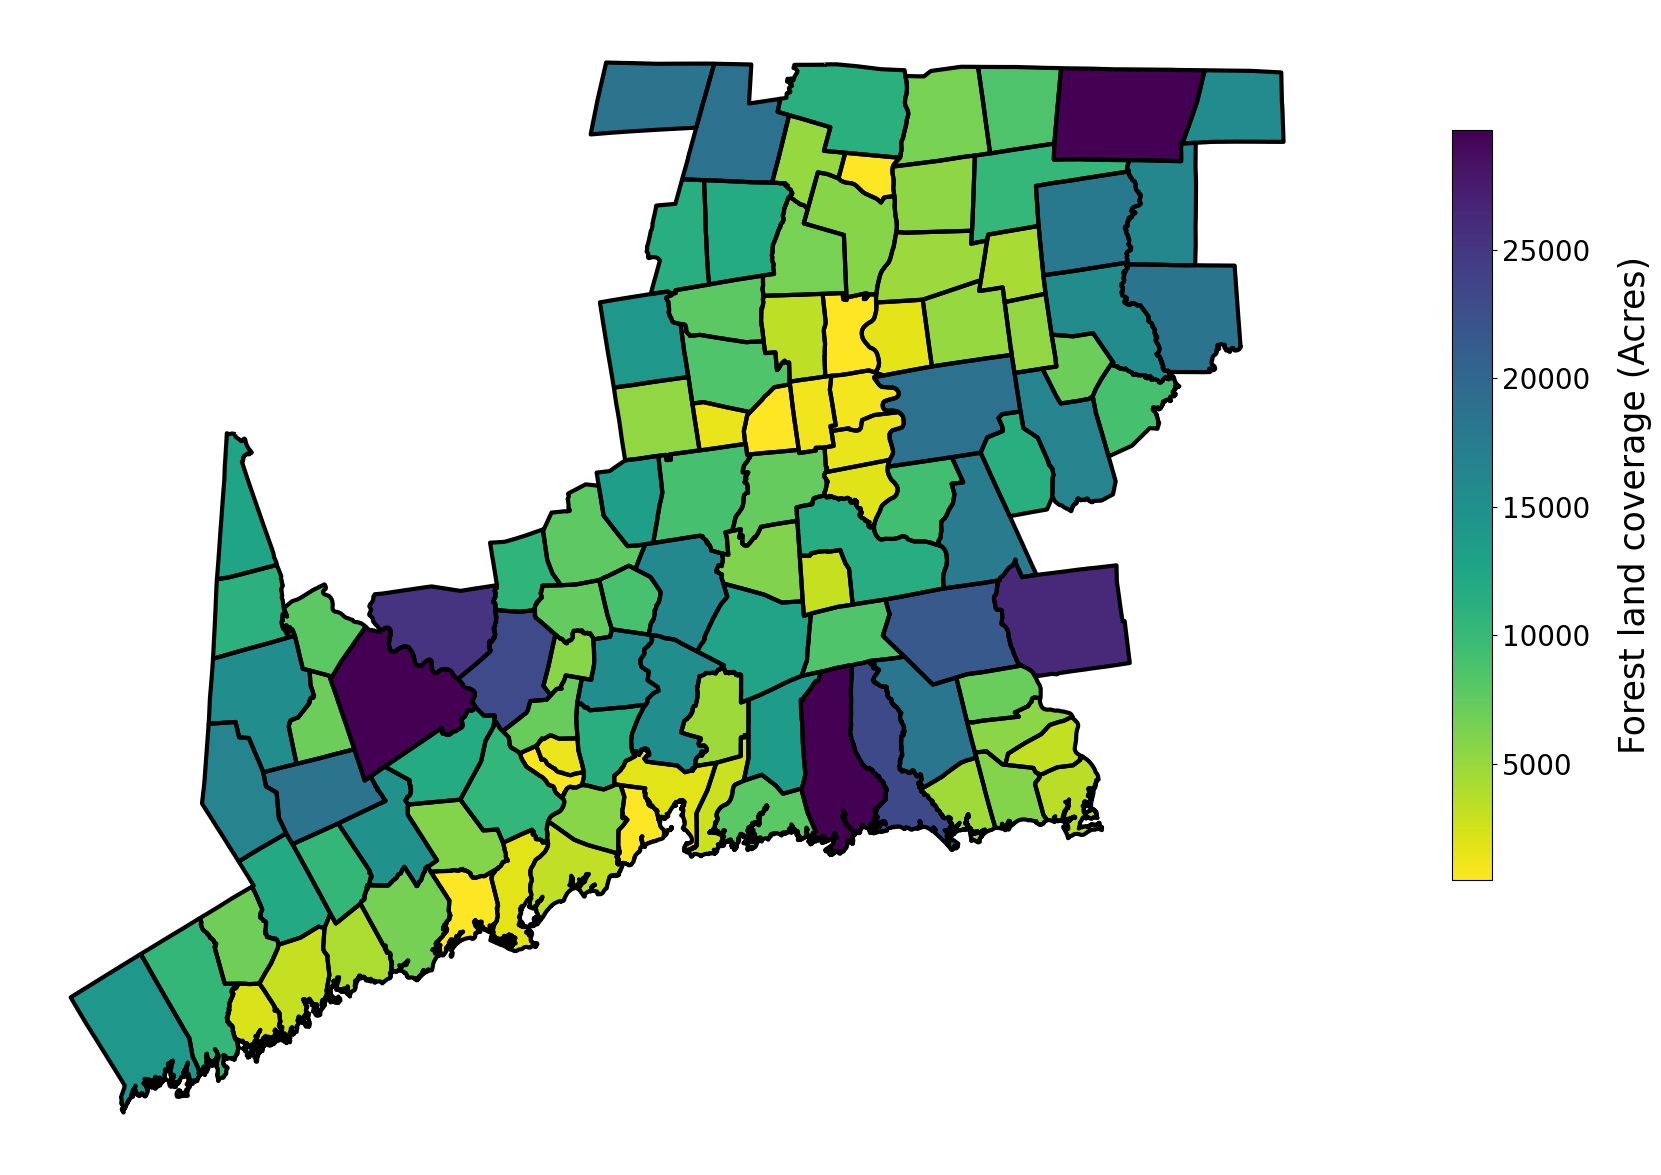

In [16]:
ax.set_axis_off()

# Load the shapefile for the towns in Connecticut
towns = merged_data

# Define county to MSA mappings
county_to_msa = {
    'New Haven': 'New Haven MSA',
    'Fairfield': 'Bridgeport MSA',
    'Hartford': 'Hartford MSA',
    'Tolland': 'Hartford MSA',
    'Middlesex': 'Hartford MSA'
}

# Create separate GeoDataFrames for each county
county_gdfs = {}
for county, msa in county_to_msa.items():
    county_gdfs[county] = towns[towns['COUNTY'] == county]

# Combine towns in each county into MSAs
msa_gdfs = {}
for county, msa in county_to_msa.items():
    if msa not in msa_gdfs:
        msa_gdfs[msa] = county_gdfs[county]
    else:
        msa_gdfs[msa] = gpd.GeoDataFrame(pd.concat([msa_gdfs[msa], county_gdfs[county]], ignore_index=True))

# Plot all MSAs on the same map with heatmap
fig, ax = plt.subplots(figsize=(20, 15))
# Remove frame and ticks
ax.axis('off')

# Plot the heatmap for each MSA
for msa, gdf in msa_gdfs.items():
    gdf.plot(column='All forest', cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap
    gdf.boundary.plot(ax=ax, linewidth=3, color='black')  # Plot the boundary of each MSA

# Add a colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=plt.Normalize(vmin=merged_data['All forest'].min(), vmax=merged_data['All forest'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)
colorbar.set_label('Forest land coverage (Acres)', labelpad=20, fontsize=25)  
colorbar.ax.tick_params(axis='y', labelsize=20)  
#plt.savefig('../../../figures/Report-images/heatmap-CT-forest.png', dpi=600, bbox_inches='tight')


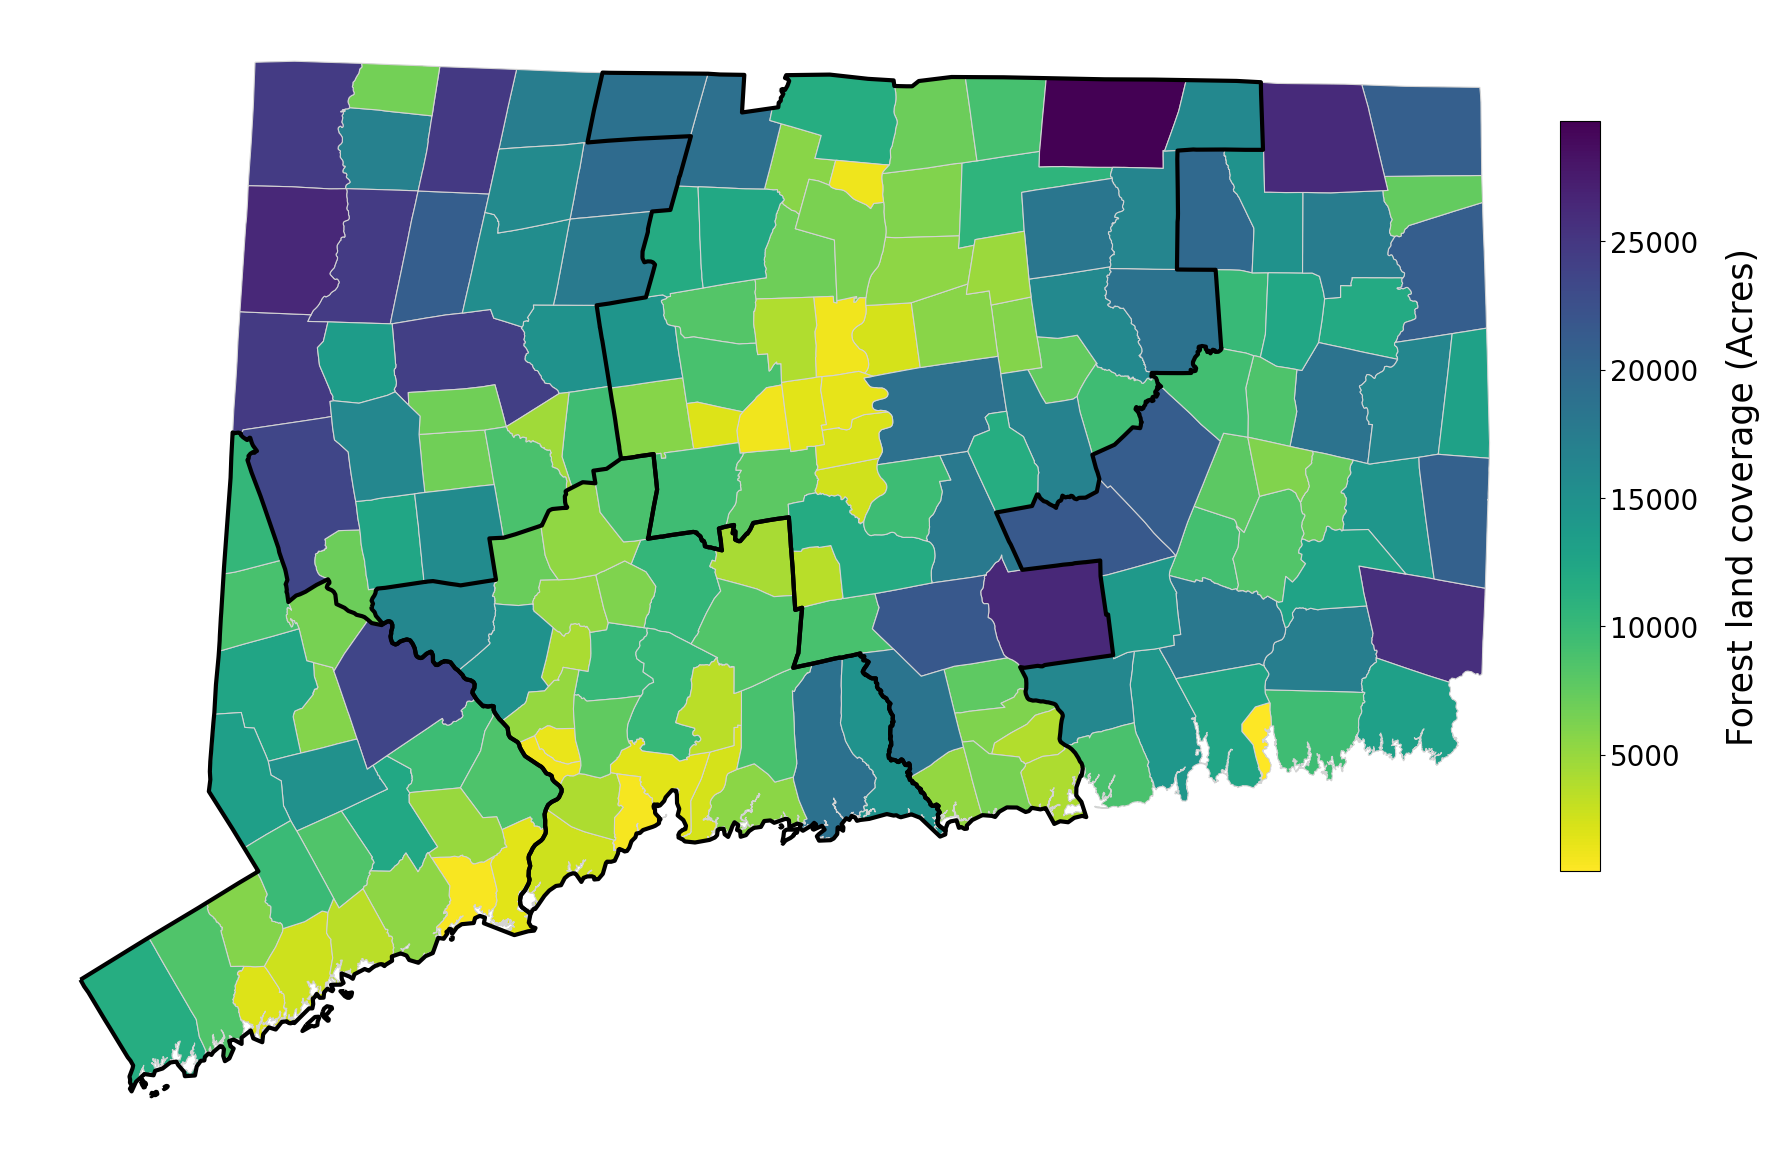

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
#town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the heatmap with adjusted boundary color
merged_data.plot(column='All forest', cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap

# Annotate with town labels
#for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
    #text = ax.text(x, y, label, fontsize=9, ha='center', va='center', color='white')
    # Add path effects
    #text.set_path_effects([path_effects.withStroke(linewidth=0.1, foreground='black')])
    
# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
NHM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with a color matching the heatmap
HEM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#HEM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with a color matching the heatmap
BSN.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#BSN.plot(ax=ax, facecolor='darkorange', alpha=0.5)

cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=plt.Normalize(vmin=merged_data['All forest'].min(), vmax=merged_data['All forest'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)
colorbar.set_label('Forest land coverage (Acres)', labelpad=20, fontsize=25)  # Add a label to the color bar with extra padding

# Directly set the font size of color bar ticks
colorbar.ax.tick_params(axis='y', labelsize=20)  # Adjust the labelsize parameter to your desired font size

#plt.show()
plt.savefig('../../../figures/Report-images/heatmap-CT-forest.png', dpi=600, bbox_inches='tight')

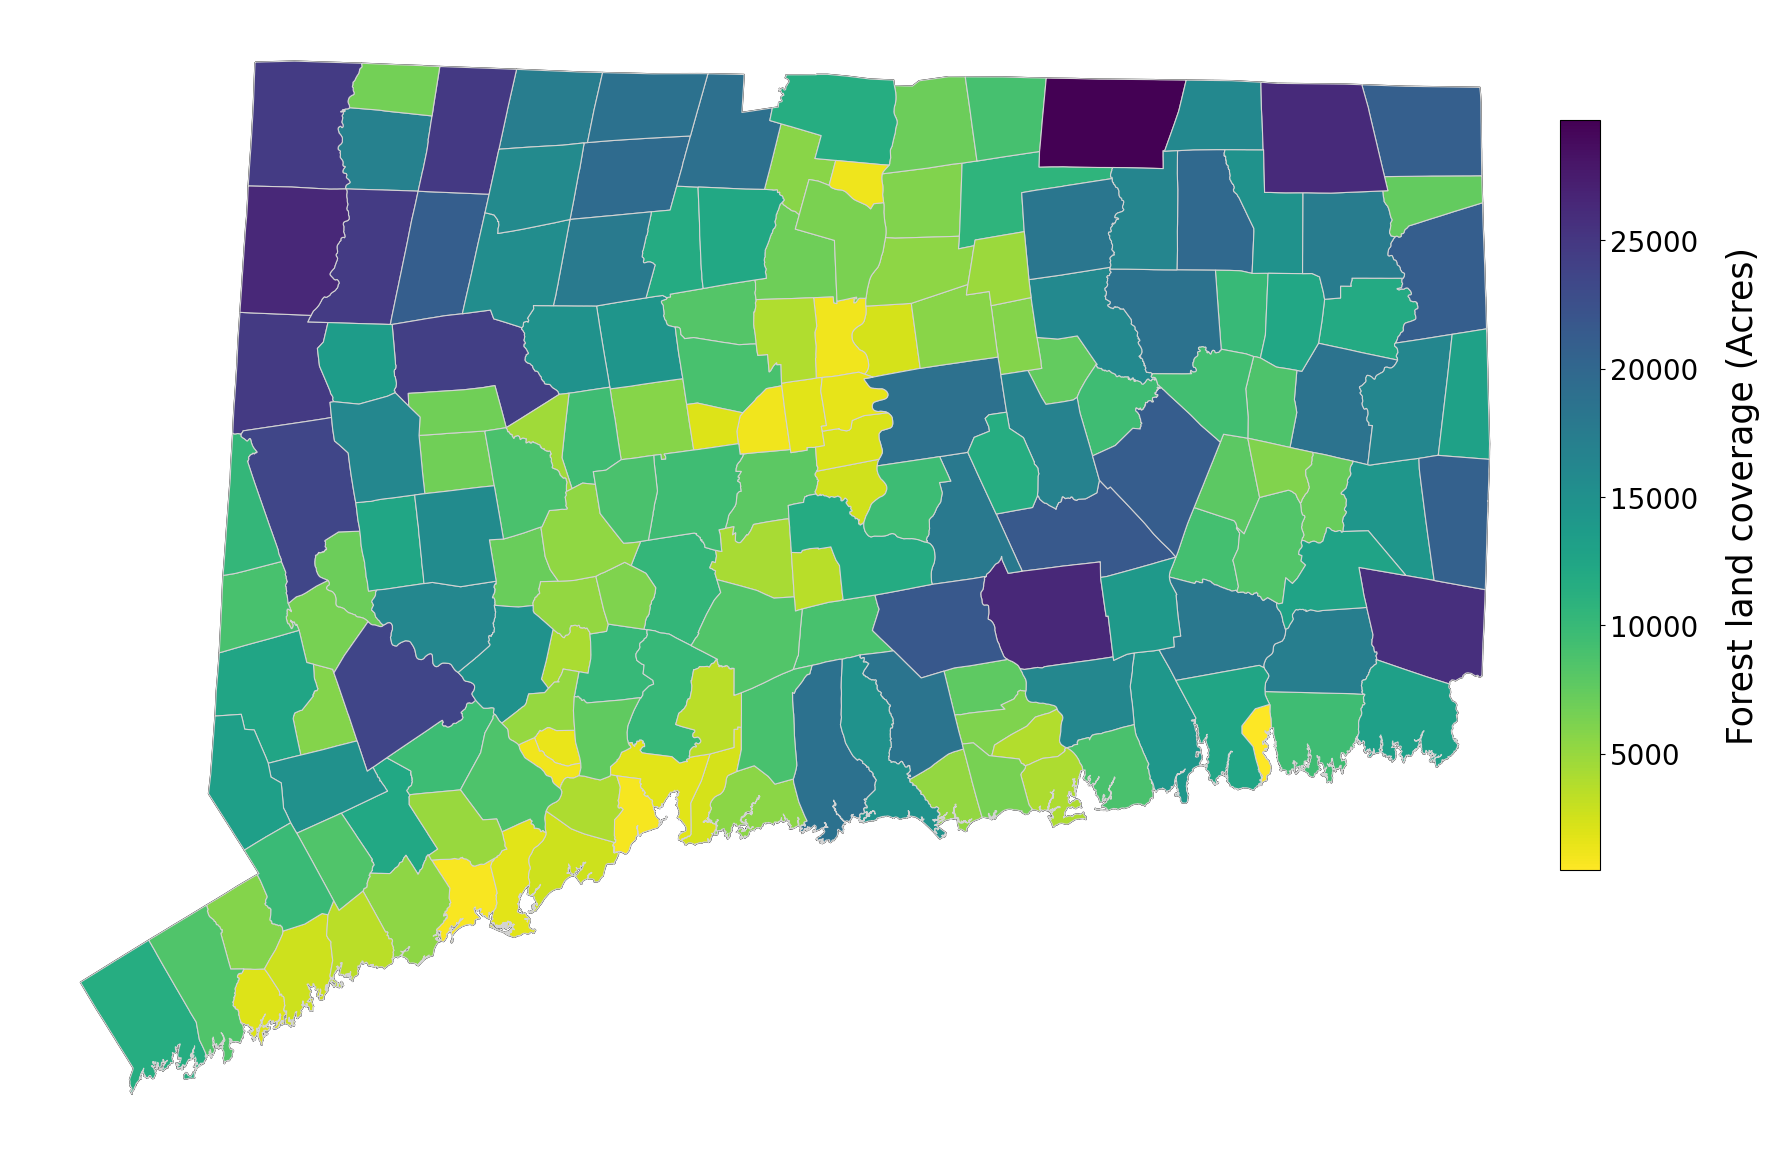

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the heatmap with adjusted boundary color
merged_data.plot(column='All forest', cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap


cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=plt.Normalize(vmin=merged_data['All forest'].min(), vmax=merged_data['All forest'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)
colorbar.set_label('Forest land coverage (Acres)', labelpad=20, fontsize=25)  # Add a label to the color bar with extra padding

# Directly set the font size of color bar ticks
colorbar.ax.tick_params(axis='y', labelsize=20)  # Adjust the labelsize parameter to your desired font size

#plt.show()
plt.savefig('../../../figures/Report-images/heatmap-forest.png', dpi=600, bbox_inches='tight')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_12664\3945129459.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):


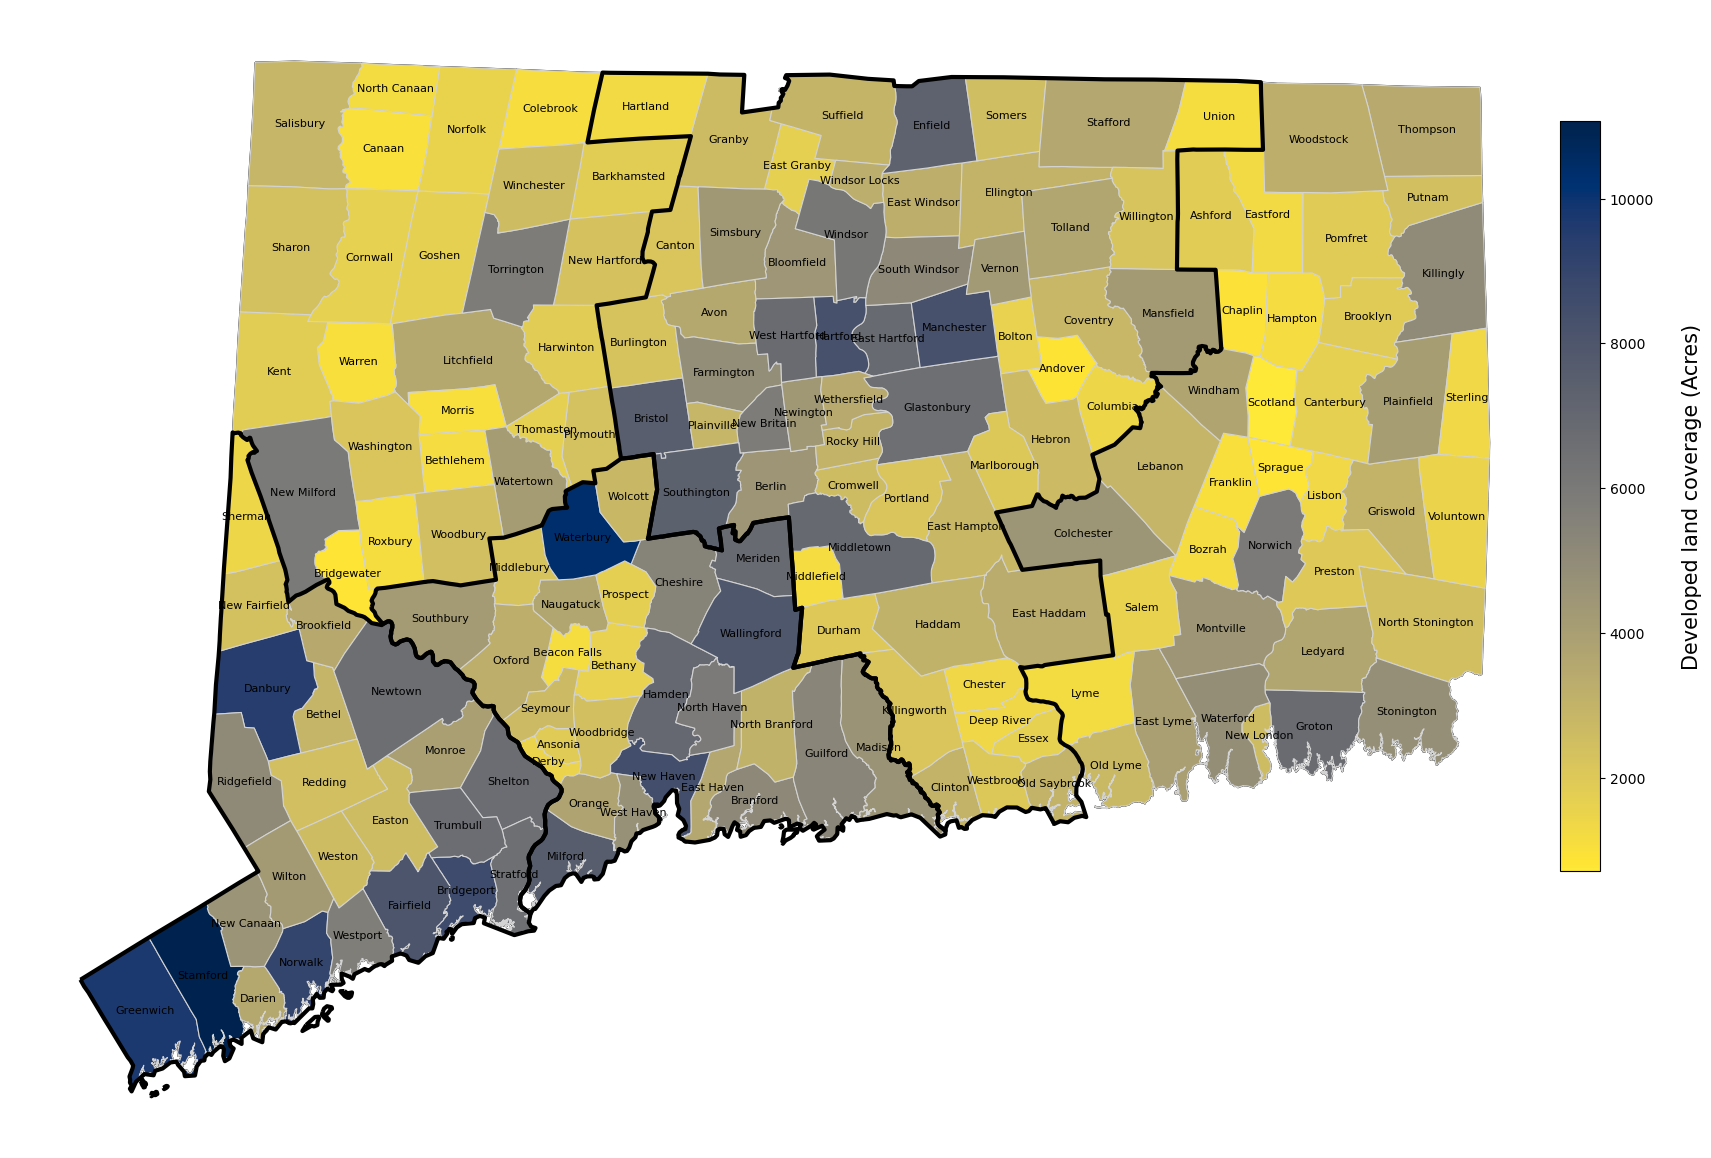

In [7]:
# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the heatmap with adjusted boundary color
merged_data.plot(column='developed', cmap='cividis_r', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap

# Annotate with town labels
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    
# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
NHM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with a color matching the heatmap
HEM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#HEM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with a color matching the heatmap
BSN.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#BSN.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Add colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='cividis_r', norm=plt.Normalize(vmin=merged_data['developed'].min(), vmax=merged_data['developed'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)
colorbar.set_label('Developed land coverage (Acres)', labelpad=20, fontsize=15)  # Use colorbar.set_label to set the label
colorbar.ax.tick_params(axis='x', labelsize=20)


#plt.show()
plt.savefig('../../../figures/Report-images/heatmap-CT-developed-land.png', dpi=600, bbox_inches='tight')